<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy as scipy
import pandas as pd


#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del circuito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.04

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.





In [ ]:
t= np.array([1.00,1.01,1.02,1.03,1.04]) # en s
i= np.array([3.10,3.12,3.14,3.18,3.24]) # en A

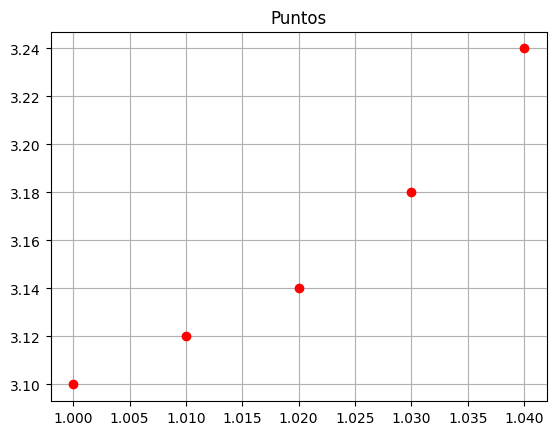

In [ ]:
plt.plot(t,i,"ro")
plt.title("Puntos")
plt.grid()

In [ ]:
L= 0.98
R= 0.142 # en ohms

In [ ]:
df= pd.DataFrame({"Tiempo": t,"Corriente":i})
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [ ]:
for j in range(len(t)-1):
  derivada=([j+1]-i[j])/(t[j+1]-t[j])

In [ ]:
# derivada númerica

def derivada (t,i):
  return  np.diff(i)/np.diff(t)

def promedio (x):
  return (x[1:] + x[0:-1])*0.5

In [ ]:
derivada(t,i)

array([2., 2., 4., 6.])

In [ ]:
prom_i= promedio(i)
prom_t= promedio(t)
Fem= L*derivada(t,i)+R*prom_i

In [ ]:
df_1=pd.DataFrame({"Prom_i": prom_i,"Prom_t":prom_t,"Fem":Fem})
df_1

,Prom_i,Prom_t,Fem
0,3.11,1.005,2.40162
1,3.13,1.015,2.40446
2,3.16,1.025,4.36872
3,3.21,1.035,6.33582


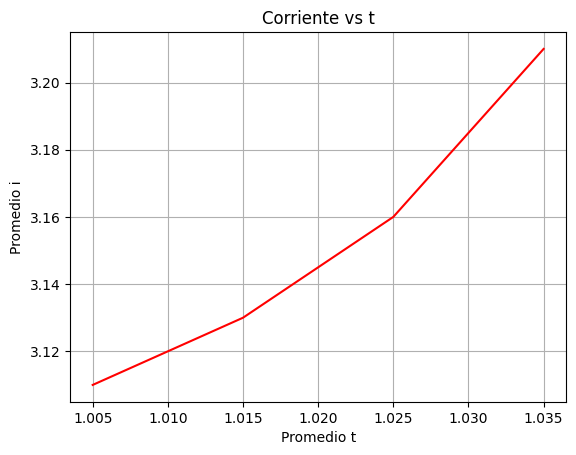

In [ ]:
plt.plot(df_1.Prom_t, df_1.Prom_i,c="r")
plt.title("Corriente vs t")
plt.ylabel("Promedio i")
plt.xlabel("Promedio t")
plt.grid()




# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!--
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


* $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


-

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!--
-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!--
-
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio


 $$
 \int_a^{b} f(x) dx = \frac{b-a}{2}(f(a)-f(b))
 $$

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson

Es el resultado cuando se realiza una interpolación con polinomio de segundo grado. Sería la integral para un solo tramo.

\begin{equation}
  \\\int_a^{b} f(x) dx\approx \frac{b-a}{3}[ f(a)+4f(\frac{a+b}{2})+f(b)]
\end{equation}


4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

**Integral de tangente**

$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

In [2]:
# Método del trapecio: ¿A partir de que N el error es menor que 1E-5?

def funcion(x):
  return 1/np.sqrt(np.tan(x))

x_= np.linspace(0.00001,np.pi/2,10000) # valor tan pequeño distinto de cero

scipy.integrate.trapezoid(funcion(x_), x_, dx=1E-5)

2.2269584986151783

In [ ]:
def integral_trapz(f,a,b,N):

  x= np.linspace (a,b,int(N))
  h=(b-a)/N
  A= ( f(x[0]) + f(x[-1]) + 2*f(x[1:-1]).sum())*h*0.5
  return A

In [ ]:
g= lambda x: 1/np.sqrt(np.tan(x))

In [ ]:
integral_trapz(g,0.00001,np.pi/2,10000)

2.226735802765317

In [ ]:
# Método de simpson

scipy.integrate.simpson(funcion(x_), x_, dx=1E-5)

2.2211097513315843

In [ ]:
# Código vectorizado

def simpson_c(a,b,N):

  x= np.linspace(a,b,N)
  a= x[0]
  b= x[-1]
  h= (b-a)/N

  s1= x[2:N-2:2] # términos a recorrer
  s2= x[1:N-1:2]

  e= (h/3*(funcion(a)+ 2*funcion(s1).sum() + 4*funcion(s2).sum() + funcion(b))).sum()

  return e

In [ ]:
simpson_c(0.00001,np.pi/2,10000)

2.2208859035985116

In [ ]:
# Método cuadratura falta

f= lambda x:1/np.sqrt(np.tan(x))
scipy.integrate.quad(f, 0.00001, np.pi/2)

(2.215116913771584, 1.3154568294699838e-08)

**Integral límites infinitos**

Si se realiza la sustitución trigonométrica $$x=tan(\theta)$$ se obtiene la integral
$$
 \ \int_{-\pi/2}^{\pi/2} \, d\theta
 $$

In [27]:
# Método del trapecio

y=x/x  # de esta manera la funcion lo interpreta

x= np.linspace(-np.pi/2, np.pi/2)

scipy.integrate.trapezoid(y, x)

3.141592653589793

In [28]:
# Método de Simpson

scipy.integrate.simpson(y, x, dx=1E-5)

3.141592653589793

In [33]:
# Método de cuadratura

def f(x):
  return 1
resultado, error = scipy.integrate.quad(f, -np.pi/2, np.pi/2)

resultado, error

(3.141592653589793, 3.487868498008632e-14)

**Integral doble**


$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

In [36]:
# Método del trapecio

x__= sp.symbols("x")
y_= sp.symbols("y")

In [37]:
# Integral simbólica

f = 2*y_ * sp.sin(x__) + sp.cos(x__)**2
sp.integrate(f,y_)

y**2*sin(x) + y*cos(x)**2

In [38]:
g= lambda x,y: 2*y*np.sin(x)+np.cos(x)**2

In [39]:
x_valor= np.linspace(0,np.pi/4,100)
I1= np.zeros(len(x_valor))

for i,x in enumerate(x_valor):
  y = np.linspace(np.sin(x), np.cos(x), 100)
  U= g(x, y)
  I1[i]= scipy.integrate.trapezoid(U, y, dx=1E-5)


In [40]:
scipy.integrate.trapezoid(I1, x_valor, dx=1E-5)

0.5118335093392186

In [99]:
# Método de Simpson

I2= np.zeros(len(x_valor))

for i,x in enumerate(x_valor):
  y = np.linspace(np.sin(x), np.cos(x), 100)
  U= g(x,y)
  I2[i]=scipy.integrate.simpson(U, y, dx=1E-5)

In [51]:
scipy.integrate.simpson(I2, x_valor, dx=1E-5)

0.5118446374265215

In [112]:
# Método de cuadratura

I3= np.zeros(len(x_valor))

def U(y):
        return g(x, y)

for i,x in enumerate(x_valor):
  y = np.linspace(np.sin(x), np.cos(x), 100)
  F= U
  resultado, error= scipy.integrate.quad(F, np.sin(x), np.cos(x))
  I3[i] = resultado

In [113]:
f= lambda x: I3.sum()

In [116]:
resultado, error = scipy.integrate.quad(f, 0, np.pi/4)
resultado

51.06421650628136

5. (No se resulve)The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}



$m_1 = 1-m$,

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->


7 (No se resulve)Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

5. Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto 5.

In [ ]:
# Parámetros iniciales

m= 1  # kg
g= 9.8  # m/s**2
d= 0.3 # cm
theta_0= np.pi/3  # ángulo máximo del péndulo
I0= 1/12*m*(d)**2
P0= 2*np.pi*np.sqrt(I0/m*g*d)

In [ ]:
phi=(np.sin(theta_0/2)/np.sin(theta_0/2))**2
k= np.sin(theta_0/2)

In [ ]:
f= lambda phi: 1/np.sqrt(1-k**2*phi)

In [ ]:
phi= np.linspace(0,np.pi/2,10000)

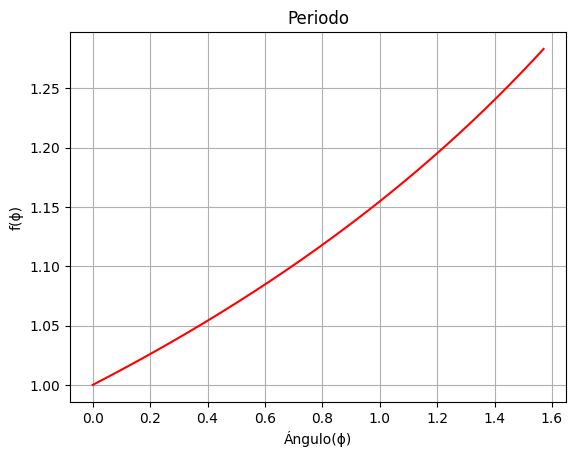

In [ ]:
plt.plot(p,f(p),c="r")
plt.xlabel("Ángulo(ϕ)")
plt.ylabel("f(ϕ)")
plt.title("Periodo")
plt.grid()

In [ ]:
# Método del trapezoide

y = 1/np.sqrt(1-k**2*phi)
p= np.linspace(0,np.pi/2,10000)

integral= scipy.integrate.trapezoid(y,p)

2*P0/np.pi*integral

1.0487359799458047

In [ ]:
# Método quad

integral_1= scipy.integrate.quad(f, 0, np.pi/2)
integral_1

(1.7656388642234033, 1.960252920233833e-14)

In [ ]:
2*P0/np.pi*1.7656388642234033

1.048735979775861

# **Periodo en función del ángulo**

In [ ]:
t_valores= np.linspace(0,np.pi/4)
lista= np.zeros(len(t_valores))

for i in range(0,len(t_valores)):
  k= np.sin(t_valores[i]/2)
  phi= np.linspace(0,np.pi/2)
  f= lambda phi: 1/np.sqrt(1-k**2*np.sin(phi))
  y= f(phi)
  lista[i]=scipy.integrate.trapezoid(y,phi)

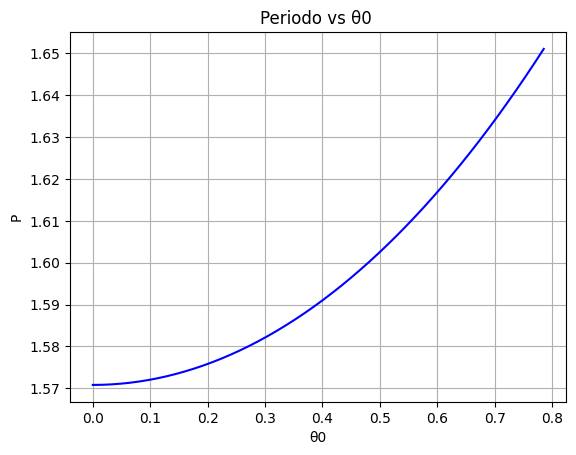

In [ ]:
plt.plot(t_valores,lista,c="b")
plt.xlabel("θ_0")
plt.ylabel("P")
plt.title("Periodo vs θ_0 ")
plt.grid()